In [1]:
"""
Name: Divyansh Mishra     
RollNo-27

Section-P

Topic: Covid19 CT scans analysis
     
GLA University,Mathura

"""     

'\nName: Divyansh Mishra     \nRollNo-27\n\nSection-P\n\nTopic: Covid19 CT scans analysis\n     \nGLA University,Mathura\n\n'

In [1]:
# Importing needed packages
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score


paths_to_covid_images = glob(os.path.join(os.getcwd(),'CT_COVID\\*.png'))
paths_to_non_covid_images = glob(os.path.join(os.getcwd(),'CT_NonCOVID\\*.png'))
paths_to_non_covid_images.extend(glob(os.path.join(os.getcwd(),'CT_NonCOVID\\*.jpg')))


print("no. of non - covid scans = ",len(paths_to_non_covid_images))
print("no. of covid scans = ",len(paths_to_covid_images))
print("Total no. of scans = ",len(paths_to_non_covid_images)+len(paths_to_covid_images))

no. of non - covid scans =  397
no. of covid scans =  349
Total no. of scans =  746


original size: (294, 383, 3) resized to: (256, 256, 3)


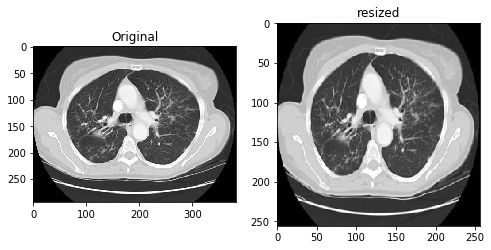

In [3]:
# Example of a scanned image and resizing it to (256 by 256) PIXELS

image_no = 45  # out of 397 scans

original_image_array = cv2.imread(paths_to_non_covid_images[image_no])
resized_image_array = cv2.resize(original_image_array, (256,256), interpolation=cv2.INTER_LINEAR)


f = plt.figure(figsize=(8, 8))
f.add_subplot(1, 2, 1)
plt.imshow(original_image_array) , plt.title("Original")
f.add_subplot(1,2, 2)
plt.imshow(resized_image_array) , plt.title("resized")    

print("original size:",original_image_array.shape, "resized to:",resized_image_array.shape)

In [4]:
# Making training numpy array of original sized images

x_trainig_set_of_orig_resized_img_arr = []


# adding non-covid(y = 0) scans to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_non_covid_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_trainig_set_of_orig_resized_img_arr.append(res)
    
 
    
    
    
    
    
# adding covid(y = 1) scans to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_covid_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_trainig_set_of_orig_resized_img_arr.append(res)


    
    
x_trainig_set_of_orig_resized_img_arr = np.array(x_trainig_set_of_orig_resized_img_arr)         # confirmation to be numpy array 

In [5]:
# defining y training set

y_traing_set = np.hstack((np.zeros((1, len(paths_to_non_covid_images)), dtype = int), np.ones((1, len(paths_to_covid_images)), dtype = 'int32')))


In [6]:
############################### NPV approach ################################################################################### 

total_no_of_pixels_values_in_a_processed_image = 256*256*3

train_set_NPV = x_trainig_set_of_orig_resized_img_arr.reshape( total_no_of_pixels_values_in_a_processed_image , -1).T


In [7]:
# Diminesions of data

print("size of x_trainig_set_of_orig_resized_img_arr :",x_trainig_set_of_orig_resized_img_arr.shape)
print("size of train_set_NPV :",train_set_NPV.shape)
print("size of y_traing_set :",y_traing_set.shape)

size of x_trainig_set_of_orig_resized_img_arr : (746, 256, 256, 3)
size of train_set_NPV : (746, 196608)
size of y_traing_set : (1, 746)


In [9]:
#################################################### MPV approach ##############################################################

train_set_MPV=np.array([])

count=0
for i in  x_trainig_set_of_orig_resized_img_arr:
   
    count=count+1
    
    
    temp=np.array([])
        
    
    # i --> each image
    
    cnt=0
    
    for j in i:
        
        cnt=cnt+1
        
        # j --> each 3(R,G,B) rows of i'th image
        
        if cnt==1:
            R1=np.concatenate(((j[:,0]*j[:,1])/255,(j[:,0]*j[:,2])/255,(j[:,1]*j[:,2])/255,(j[:,0]*j[:,0]*j[:,0])/(255*255)),axis=None)
        
        elif cnt==2:
            R2=np.concatenate(((j[:,0]*j[:,1])/255,(j[:,0]*j[:,2])/255,(j[:,1]*j[:,2])/255,(j[:,0]*j[:,0]*j[:,0])/(255*255)),axis=None)
        
        elif cnt==3:
            temp=np.concatenate((R1,R2,(j[:,0]*j[:,1])/255,(j[:,0]*j[:,2])/255,(j[:,1]*j[:,2])/255,(j[:,0]*j[:,0]*j[:,0])/(255*255)), axis=None)
            
        else:
            temp=np.concatenate((temp,(j[:,0]*j[:,1])/255,(j[:,0]*j[:,2])/255,(j[:,1]*j[:,2])/255,(j[:,0]*j[:,0]*j[:,0])/(255*255)),axis=None)
    
    
    
    temp=temp.reshape(temp.shape[0],1)
     
        
    if count==1:
        T1=temp
    elif count==2:
        T2=temp
    elif count==3:
        train_set_MPV=np.concatenate((T1,T2) , axis=1)  
        train_set_MPV=np.concatenate(( train_set_MPV , temp) , axis=1)   
    else:    
        train_set_MPV=np.concatenate(( train_set_MPV , temp) , axis=1)   
        
################################################################################################################################

        
    

print('size of train_set_MPV =',train_set_MPV.shape)
    

size of train_set_MPV = (262144, 746)


In [12]:
################################################ APV approach ##################################################################

train_set_APV=np.array([])

train_set_APV = np.vstack((train_set_NPV.T,train_set_MPV))

print('size of train_set_APV =',train_set_APV.shape)



size of train_set_APV = (458752, 746)


In [13]:
# All training sets are ready, Now, getting them in needed dimensions

train_set_MPV = train_set_MPV.T
train_set_APV = train_set_APV.T



In [16]:
# Dimensions of all training sets

print("Total no. of images of CT-Scans = ",len(paths_to_non_covid_images) + len(paths_to_covid_images))

print('size of train_set_NPV =',train_set_NPV.shape)
print('size of train_set_MPV =',train_set_MPV.shape)
print('size of train_set_APV =',train_set_APV.shape)

# each row of each array of training set represents each image preprocessed by that particual approach

Total no. of images of CT-Scans =  746
size of train_set_NPV = (746, 196608)
size of train_set_MPV = (746, 262144)
size of train_set_APV = (746, 458752)


In [17]:
########################### Applying Logistic Regressions and SVM on NPV Approach and evaluating Accuracy ######################



In [18]:
#  Splitting the data for NPV approach

X_train, X_test, y_train, y_test = train_test_split(train_set_NPV, y_traing_set.T, test_size = 0.33, random_state = 42)



In [20]:
# Building the Model by Logistic regressions and predicting over train_set_NPV

model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# accuracy Analysis
print("By Logistic regressions")
print()
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusion Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print()
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By Logistic regressions

Model Score : 0.9919028340080972

Accuracy : 0.9919028340080972

Confusion Mtrix :
[[137   2]
 [  0 108]]

F1-score =  0.9908256880733944


In [21]:
# Building the Model By SVM and predicting over train_set_NPV

model=SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


# accuracy Analysis
print("By SVM")
print()
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusio Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print()
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By SVM

Model Score : 0.9959514170040485

Accuracy : 0.9959514170040485

Confusio Mtrix :
[[138   1]
 [  0 108]]

F1-score =  0.9953917050691244


In [22]:
########################### Applying Logistic Regressions and SVM on MPV Approach and evaluating Accuracy ######################



In [23]:
#  Splitting the data for MPV approach

X_train, X_test, y_train, y_test = train_test_split(train_set_MPV, y_traing_set.T, test_size = 0.33, random_state = 42)


In [24]:
# Building the Model by Logistic regressions and predicting over train_set_MPV

model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# accuracy Analysis
print("By Logistic regressions")
print()
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusion Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print()
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By Logistic regressions

Model Score : 0.708502024291498

Accuracy : 0.708502024291498

Confusion Mtrix :
[[112  27]
 [ 45  63]]

F1-score =  0.6363636363636365


In [25]:
# Building the Model By SVM and predicting over train_set_MPV

model=SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


# accuracy Analysis
print("By SVM")
print()
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusio Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print()
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By SVM

Model Score : 0.6882591093117408

Accuracy : 0.6882591093117408

Confusio Mtrix :
[[121  18]
 [ 59  49]]

F1-score =  0.5599999999999999


In [26]:
########################### Applying Logistic Regressions and SVM on APV Approach and evaluating Accuracy ######################



In [27]:
#  Splitting the data for APV approach

X_train, X_test, y_train, y_test = train_test_split(train_set_APV, y_traing_set.T, test_size = 0.33, random_state = 42)


In [28]:
# Building the Model by Logistic regressions and predicting over train_set_APV

model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# accuracy Analysis
print("By Logistic regressions")
print()
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusion Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print()
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By Logistic regressions

Model Score : 0.9959514170040485

Accuracy : 0.9959514170040485

Confusion Mtrix :
[[138   1]
 [  0 108]]

F1-score =  0.9953917050691244


In [29]:
# Building the Model By SVM and predicting over train_set_APV

model=SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


# accuracy Analysis
print("By SVM")
print()
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusio Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print()
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By SVM

Model Score : 1.0

Accuracy : 1.0

Confusio Mtrix :
[[139   0]
 [  0 108]]

F1-score =  1.0
